In [1]:
# Importing the necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import r2_score, mean_squared_error

# LOAD AND EXPLORE THE DATA 

In [2]:
# Load the .csv file - Churn prediction.csv
df = pd.read_csv(r"C:\Users\kiran\OneDrive\Desktop\Churn Prediction.csv")
display(df.head())

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
0,1001.0,56.0,Other,02-04-25,13-07-25,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99
1,1002.0,69.0,Male,02-01-23,13-07-25,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99
2,1003.0,46.0,Male,21-08-22,13-07-25,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99
3,1004.0,32.0,Other,14-09-23,13-07-25,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99
4,1005.0,60.0,Female,29-07-23,13-07-25,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99


In [3]:
# Displaying information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1498 non-null   float64
 1   age                   1497 non-null   float64
 2   gender                1499 non-null   object 
 3   signup_date           1498 non-null   object 
 4   last_active_date      1498 non-null   object 
 5   country               1497 non-null   object 
 6   subscription_type     1497 non-null   object 
 7   average_watch_hours   1496 non-null   float64
 8   mobile_app_usage_pct  1498 non-null   float64
 9   complaints_raised     1497 non-null   float64
 10  received_promotions   1497 non-null   object 
 11  referred_by_friend    1497 non-null   object 
 12  is_churned            1499 non-null   float64
 13  monthly_fee           1355 non-null   float64
dtypes: float64(7), object(7)
memory usage: 164.2+ KB


In [4]:
# Using the describe method to understand the structure and mathematical calculations of the dataset
df.describe()

,user_id,age,average_watch_hours,mobile_app_usage_pct,complaints_raised,is_churned,monthly_fee
count,1498.000000,1497.000000,1496.000000,1498.000000,1497.000000,1499.000000,1355.000000
mean,1750.871829,43.738811,39.903342,51.414419,2.498330,0.234156,10.180406
std,433.060980,15.083920,22.978288,28.580117,1.706829,0.423612,3.310705
min,1001.000000,18.000000,0.500000,0.000000,0.000000,0.000000,5.990000
25%,1376.250000,31.000000,19.450000,27.100000,1.000000,0.000000,5.990000
50%,1750.500000,44.000000,40.300000,52.700000,2.000000,0.000000,9.990000
75%,2125.750000,56.000000,59.800000,76.200000,4.000000,0.000000,13.990000
max,2500.000000,69.000000,79.900000,100.000000,5.000000,1.000000,14.990000


In [5]:
# Missing values in the dataset
print("Missing values in the sales dataset: \n", df.isnull().sum())

Missing values in the sales dataset: 
 user_id                   2
age                       3
gender                    1
signup_date               2
last_active_date          2
country                   3
subscription_type         3
average_watch_hours       4
mobile_app_usage_pct      2
complaints_raised         3
received_promotions       3
referred_by_friend        3
is_churned                1
monthly_fee             145
dtype: int64


In [6]:
# Displaying the column options with counts
print("Gender Counts \n ", df['gender'].value_counts())

Gender Counts 
  Female    510
Other     506
Male      483
Name: gender, dtype: int64


In [7]:
print("Country Counts \n ", df['country'].value_counts())

Country Counts 
  Canada     262
India      259
France     254
Germany    246
UK         241
USA        235
Name: country, dtype: int64


In [8]:
print("Type of Subscription Counts \n ", df['subscription_type'].value_counts())

Type of Subscription Counts 
  Basic       505
Premium     499
Standard    493
Name: subscription_type, dtype: int64


In [9]:
print("Promotions Received Counts \n ", df['received_promotions'].value_counts())

Promotions Received Counts 
  No     763
Yes    734
Name: received_promotions, dtype: int64


In [10]:
print("Referred by a friend Counts \n ", df['referred_by_friend'].value_counts())

Referred by a friend Counts 
  Yes    752
No     745
Name: referred_by_friend, dtype: int64


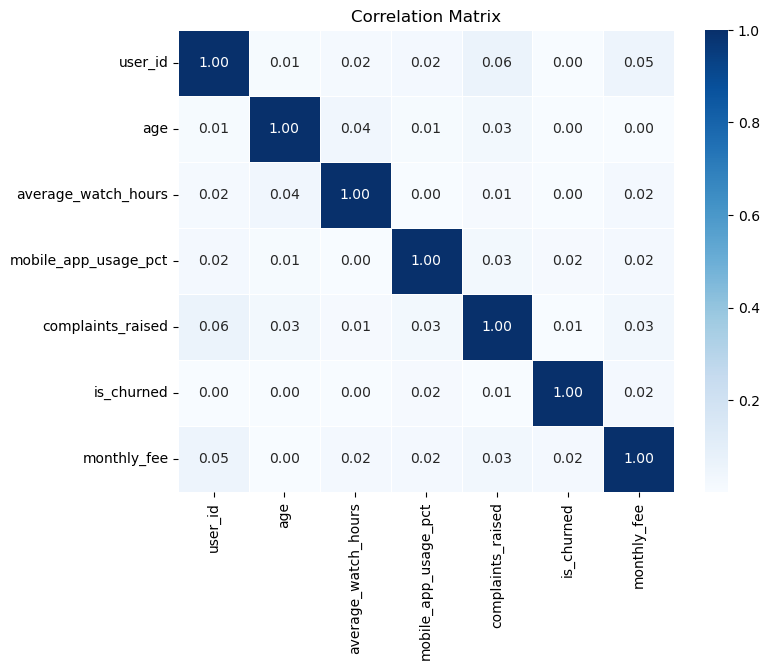

Dropping highly correlated columns: []


In [11]:
# Graphical Representations 
# Correlation Matrix 

# Step 1: Select only numeric columns 
df_numeric = df.select_dtypes(include = [np.number])

# Step 2: Compute the correlation matrix 
corr_matrix = df_numeric.corr().abs()

# Step 3: Plot heatmap 
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Step 4: Identify and drop highly correlated features
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop= [col for col in upper.columns if any(upper[col] > 0.9)]

print("Dropping highly correlated columns:", to_drop)

# Drop them from the original df 
df.drop(columns = to_drop, inplace= True)

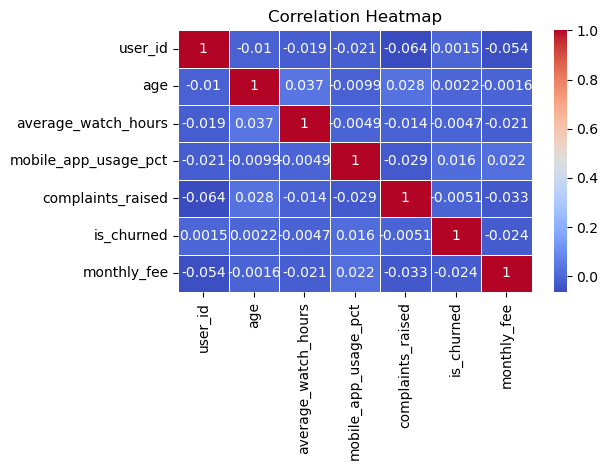

In [12]:
# Heatmap 
corr = df_numeric.corr()
# print(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# CLEAN AND PREPARE THE DATA

In [13]:
# Converting 'signup_date' and 'last_active_date' to datetime format
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_active_date'] = pd.to_datetime(df['last_active_date'])
df

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
0,1001.0,56.0,Other,2025-02-04,2025-07-13,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99
1,1002.0,69.0,Male,2023-02-01,2025-07-13,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99
2,1003.0,46.0,Male,2022-08-21,2025-07-13,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99
3,1004.0,32.0,Other,2023-09-14,2025-07-13,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99
4,1005.0,60.0,Female,2023-07-29,2025-07-13,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2496.0,40.0,Female,2023-11-26,2025-07-13,Canada,Standard,7.5,88.7,0.0,No,No,0.0,9.99
1496,2497.0,54.0,Male,2025-12-02,2025-07-13,USA,Basic,48.7,42.0,NaN,Yes,Yes,1.0,NaN
1497,2498.0,28.0,Other,2023-01-03,2025-07-13,UK,Premium,12.6,49.7,0.0,No,No,1.0,13.99
1498,2499.0,23.0,Female,2022-10-24,2025-07-13,USA,Basic,3.0,91.7,2.0,No,Yes,0.0,5.99


In [14]:
# Creating new features 
# tenure_days = days between signup and last_active_date
df["tenure_days"] = df["last_active_date"] - df["signup_date"]
df

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee,tenure_days
0,1001.0,56.0,Other,2025-02-04,2025-07-13,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99,159 days
1,1002.0,69.0,Male,2023-02-01,2025-07-13,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99,893 days
2,1003.0,46.0,Male,2022-08-21,2025-07-13,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99,1057 days
3,1004.0,32.0,Other,2023-09-14,2025-07-13,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99,668 days
4,1005.0,60.0,Female,2023-07-29,2025-07-13,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99,715 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2496.0,40.0,Female,2023-11-26,2025-07-13,Canada,Standard,7.5,88.7,0.0,No,No,0.0,9.99,595 days
1496,2497.0,54.0,Male,2025-12-02,2025-07-13,USA,Basic,48.7,42.0,NaN,Yes,Yes,1.0,NaN,-142 days
1497,2498.0,28.0,Other,2023-01-03,2025-07-13,UK,Premium,12.6,49.7,0.0,No,No,1.0,13.99,922 days
1498,2499.0,23.0,Female,2022-10-24,2025-07-13,USA,Basic,3.0,91.7,2.0,No,Yes,0.0,5.99,993 days


In [15]:
# is_loyal = tenure_days > 180
df["is_loyal"] = df["tenure_days"].dt.days.apply(lambda x: 'Yes' if x > 180 else 'No')
df["is_loyal"]

0        No
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
1495    Yes
1496     No
1497    Yes
1498    Yes
1499    Yes
Name: is_loyal, Length: 1500, dtype: object

In [16]:
# Encode categorical features - eg; LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1 = le.fit_transform(df["gender"])  # Male - 1; Female - 0; Other - 2
df1

array([2, 1, 1, ..., 2, 0, 2])

In [17]:
# Convert categorical column to one-hot encoding values 
df_encoded = pd.get_dummies(df, columns = ["subscription_type"], drop_first = True)
df_encoded

,user_id,age,gender,signup_date,last_active_date,country,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee,tenure_days,is_loyal,subscription_type_Premium,subscription_type_Standard
0,1001.0,56.0,Other,2025-02-04,2025-07-13,France,42.6,77.4,1.0,No,No,1.0,10.99,159 days,No,0,1
1,1002.0,69.0,Male,2023-02-01,2025-07-13,India,65.3,98.0,4.0,No,Yes,1.0,5.99,893 days,Yes,0,0
2,1003.0,46.0,Male,2022-08-21,2025-07-13,UK,40.1,47.8,0.0,No,Yes,1.0,13.99,1057 days,Yes,1,0
3,1004.0,32.0,Other,2023-09-14,2025-07-13,Germany,5.8,53.2,1.0,Yes,Yes,1.0,13.99,668 days,Yes,1,0
4,1005.0,60.0,Female,2023-07-29,2025-07-13,India,32.7,16.8,5.0,No,Yes,0.0,9.99,715 days,Yes,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2496.0,40.0,Female,2023-11-26,2025-07-13,Canada,7.5,88.7,0.0,No,No,0.0,9.99,595 days,Yes,0,1
1496,2497.0,54.0,Male,2025-12-02,2025-07-13,USA,48.7,42.0,NaN,Yes,Yes,1.0,NaN,-142 days,No,0,0
1497,2498.0,28.0,Other,2023-01-03,2025-07-13,UK,12.6,49.7,0.0,No,No,1.0,13.99,922 days,Yes,1,0
1498,2499.0,23.0,Female,2022-10-24,2025-07-13,USA,3.0,91.7,2.0,No,Yes,0.0,5.99,993 days,Yes,0,0


In [18]:
# dropping duplicate entries
df = df.drop_duplicates()
df

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee,tenure_days,is_loyal
0,1001.0,56.0,Other,2025-02-04,2025-07-13,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99,159 days,No
1,1002.0,69.0,Male,2023-02-01,2025-07-13,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99,893 days,Yes
2,1003.0,46.0,Male,2022-08-21,2025-07-13,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99,1057 days,Yes
3,1004.0,32.0,Other,2023-09-14,2025-07-13,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99,668 days,Yes
4,1005.0,60.0,Female,2023-07-29,2025-07-13,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99,715 days,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2496.0,40.0,Female,2023-11-26,2025-07-13,Canada,Standard,7.5,88.7,0.0,No,No,0.0,9.99,595 days,Yes
1496,2497.0,54.0,Male,2025-12-02,2025-07-13,USA,Basic,48.7,42.0,NaN,Yes,Yes,1.0,NaN,-142 days,No
1497,2498.0,28.0,Other,2023-01-03,2025-07-13,UK,Premium,12.6,49.7,0.0,No,No,1.0,13.99,922 days,Yes
1498,2499.0,23.0,Female,2022-10-24,2025-07-13,USA,Basic,3.0,91.7,2.0,No,Yes,0.0,5.99,993 days,Yes


In [19]:
# Drop missing values from all columns - this is useful when training machine learning models 
df = df.dropna()
df

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee,tenure_days,is_loyal
0,1001.0,56.0,Other,2025-02-04,2025-07-13,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99,159 days,No
1,1002.0,69.0,Male,2023-02-01,2025-07-13,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99,893 days,Yes
2,1003.0,46.0,Male,2022-08-21,2025-07-13,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99,1057 days,Yes
3,1004.0,32.0,Other,2023-09-14,2025-07-13,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99,668 days,Yes
4,1005.0,60.0,Female,2023-07-29,2025-07-13,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99,715 days,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,2495.0,51.0,Male,2022-11-16,2025-07-13,USA,Standard,43.9,6.6,3.0,Yes,No,0.0,10.99,970 days,Yes
1495,2496.0,40.0,Female,2023-11-26,2025-07-13,Canada,Standard,7.5,88.7,0.0,No,No,0.0,9.99,595 days,Yes
1497,2498.0,28.0,Other,2023-01-03,2025-07-13,UK,Premium,12.6,49.7,0.0,No,No,1.0,13.99,922 days,Yes
1498,2499.0,23.0,Female,2022-10-24,2025-07-13,USA,Basic,3.0,91.7,2.0,No,Yes,0.0,5.99,993 days,Yes


# STATISTICAL ANALYSIS & INSIGHTS

In [20]:
df.columns

Index(['user_id', 'age', 'gender', 'signup_date', 'last_active_date',
       'country', 'subscription_type', 'average_watch_hours',
       'mobile_app_usage_pct', 'complaints_raised', 'received_promotions',
       'referred_by_friend', 'is_churned', 'monthly_fee', 'tenure_days',
       'is_loyal'],
      dtype='object')

In [21]:
print(df["is_churned"].unique())

[1. 0.]


In [24]:
import warnings
warnings.filterwarnings('ignore')

# Standardize churn to int 0/1
df["is_churned"] = df["is_churned"].astype(int)

# Normalize yes/no or True/False columns to booleans, then to string labels (optional)
def to_bool(col):
    if df[col].dtype == bool:
        return
    # map common text values; adjust if your data uses different strings
    df[col] = df[col].astype(str).str.strip().str.lower().map({
        'yes': True, 'y': True, '1': True, 'true': True,
        'no': False, 'n': False, '0': False, 'false': False
    })
to_bool("received_promotions")
to_bool("referred_by_friend")

# If you prefer readable labels instead of True/False for chi-square output:
df["received_promotions"] = df["received_promotions"].map({True:"Yes", False:"No"})
df["referred_by_friend"]  = df["referred_by_friend"].map({True:"Yes", False:"No"})

# Gender as category (works even with more than two levels)
df["gender"] = df["gender"].astype("category")

# Make sure your numeric measure is numeric
df["average_watch_hours"] = pd.to_numeric(df["average_watch_hours"], errors="coerce")
df

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee,tenure_days,is_loyal
0,1001.0,56.0,Other,2025-02-04,2025-07-13,France,Standard,42.6,77.4,1.0,No,No,1,10.99,159 days,No
1,1002.0,69.0,Male,2023-02-01,2025-07-13,India,Basic,65.3,98.0,4.0,No,Yes,1,5.99,893 days,Yes
2,1003.0,46.0,Male,2022-08-21,2025-07-13,UK,Premium,40.1,47.8,0.0,No,Yes,1,13.99,1057 days,Yes
3,1004.0,32.0,Other,2023-09-14,2025-07-13,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1,13.99,668 days,Yes
4,1005.0,60.0,Female,2023-07-29,2025-07-13,India,Standard,32.7,16.8,5.0,No,Yes,0,9.99,715 days,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,2495.0,51.0,Male,2022-11-16,2025-07-13,USA,Standard,43.9,6.6,3.0,Yes,No,0,10.99,970 days,Yes
1495,2496.0,40.0,Female,2023-11-26,2025-07-13,Canada,Standard,7.5,88.7,0.0,No,No,0,9.99,595 days,Yes
1497,2498.0,28.0,Other,2023-01-03,2025-07-13,UK,Premium,12.6,49.7,0.0,No,No,1,13.99,922 days,Yes
1498,2499.0,23.0,Female,2022-10-24,2025-07-13,USA,Basic,3.0,91.7,2.0,No,Yes,0,5.99,993 days,Yes


In [25]:
# Chi square test
def chi_square_test(df, cat_col, target='is_churned'):
    # drop rows with missing values in either column
    sub = df[[cat_col, target]].dropna()
    ct = pd.crosstab(sub[cat_col], sub[target])  # rows: categories, cols: 0/1
    chi2, p, dof, expected = chi2_contingency(ct)  # Yates correction auto-applies for 2x2
    
    # Cramér's V
    n = ct.values.sum()
    r, c = ct.shape
    cramers_v = np.sqrt(chi2 / (n * (min(r, c) - 1))) if min(r, c) > 1 else np.nan
    
    return {
        "variable": cat_col,
        "chi2": chi2,
        "p_value": p,
        "dof": dof,
        "cramers_v": cramers_v,
        "contingency_table": ct,
    }

results = []
for col in ["gender", "received_promotions", "referred_by_friend"]:
    results.append(chi_square_test(df, col))

# Pretty print
for res in results:
    print(f"\n=== Chi-square: {res['variable']} vs is_churned ===")
    print(res["contingency_table"])
    print(f"chi2 = {res['chi2']:.3f}, dof = {res['dof']}, p = {res['p_value']:.4f}, Cramér's V = {res['cramers_v']:.3f}")
    if res["p_value"] < 0.05:
        print("→ Statistically significant association (α=0.05).")
    else:
        print("→ No statistically significant association (α=0.05).")

# If p < 0.05, churn is associated with that categorical variable (but this does not prove causation).


=== Chi-square: gender vs is_churned ===
is_churned    0    1
gender              
Female      341  119
Male        336   93
Other       347   97
chi2 = 2.855, dof = 2, p = 0.2399, Cramér's V = 0.046
→ No statistically significant association (α=0.05).

=== Chi-square: received_promotions vs is_churned ===
is_churned             0    1
received_promotions          
No                   507  175
Yes                  517  134
chi2 = 4.539, dof = 1, p = 0.0331, Cramér's V = 0.058
→ Statistically significant association (α=0.05).

=== Chi-square: referred_by_friend vs is_churned ===
is_churned            0    1
referred_by_friend          
No                  512  162
Yes                 512  147
chi2 = 0.467, dof = 1, p = 0.4946, Cramér's V = 0.019
→ No statistically significant association (α=0.05).


In [26]:
# T-test

# Prepare data (drop NaNs)
sub = df[["is_churned", "average_watch_hours"]].dropna()

group_churned  = sub.loc[sub["is_churned"] == 1, "average_watch_hours"]
group_retained = sub.loc[sub["is_churned"] == 0, "average_watch_hours"]

# Basic group stats
n1, n0 = len(group_churned), len(group_retained)
m1, m0 = group_churned.mean(), group_retained.mean()
s1, s0 = group_churned.std(ddof=1), group_retained.std(ddof=1)

# Welch's t-test
t_stat, p_val = ttest_ind(group_churned, group_retained, equal_var=False, nan_policy='omit')

# Effect size: Hedges' g
# Cohen's d (unequal n, pooled SD)
sp2 = ((n1-1)*s1**2 + (n0-1)*s0**2) / (n1 + n0 - 2)
sp  = np.sqrt(sp2)
cohens_d = (m1 - m0) / sp if sp > 0 else np.nan
# Small sample correction to Hedges' g
J = 1 - (3 / (4*(n1+n0) - 9)) if (n1+n0) > 9 else 1
hedges_g = cohens_d * J

print("\n=== t-test: average_watch_hours by churn status ===")
print(f"Churned    (n={n1}): mean={m1:.3f}, sd={s1:.3f}")
print(f"Retained   (n={n0}): mean={m0:.3f}, sd={s0:.3f}")
print(f"Welch t={t_stat:.3f}, p={p_val:.4f} (two-sided)")
print(f"Hedges' g = {hedges_g:.3f}")
if p_val < 0.05:
    print("→ Statistically significant difference in watch time (α=0.05).")
else:
    print("→ No statistically significant difference in watch time (α=0.05).")

# p < 0.05 → mean watch time differs between churned and retained users.


=== t-test: average_watch_hours by churn status ===
Churned    (n=309): mean=39.256, sd=23.464
Retained   (n=1024): mean=40.301, sd=22.727
Welch t=-0.691, p=0.4900 (two-sided)
Hedges' g = -0.046
→ No statistically significant difference in watch time (α=0.05).


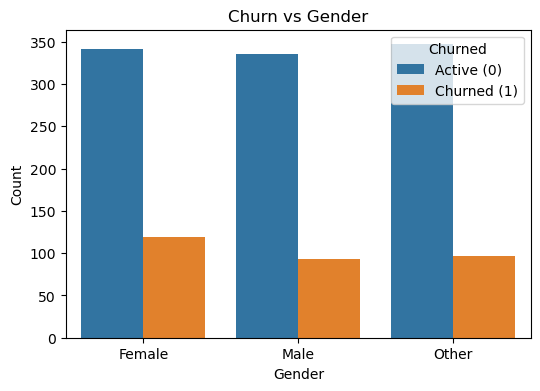

In [27]:
# Bar plot - gender distribution by churn 

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="gender", hue="is_churned")
plt.title("Churn vs Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churned", labels=["Active (0)", "Churned (1)"])
plt.show()

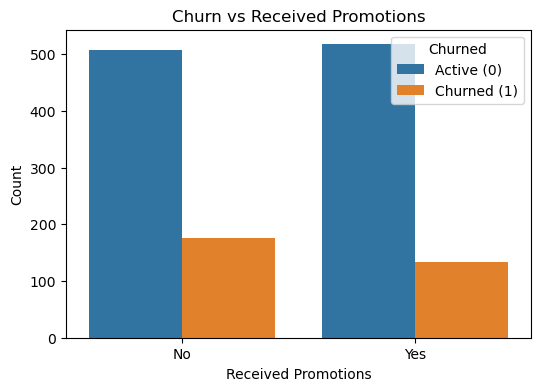

In [28]:
# Bar plot — promotions

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="received_promotions", hue="is_churned")
plt.title("Churn vs Received Promotions")
plt.xlabel("Received Promotions")
plt.ylabel("Count")
plt.legend(title="Churned", labels=["Active (0)", "Churned (1)"])
plt.show()

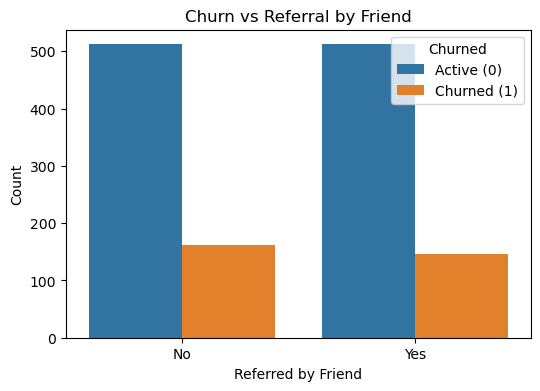

In [29]:
# Bar plot - referrals versus churn

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="referred_by_friend", hue="is_churned")
plt.title("Churn vs Referral by Friend")
plt.xlabel("Referred by Friend")
plt.ylabel("Count")
plt.legend(title="Churned", labels=["Active (0)", "Churned (1)"])
plt.show()

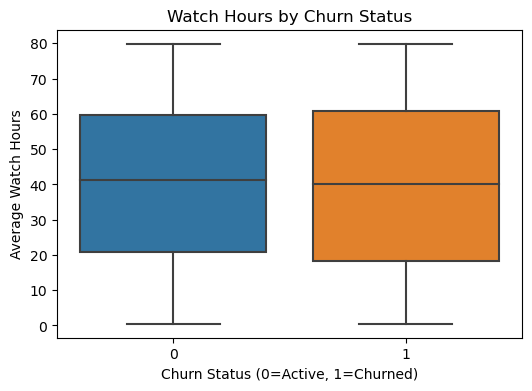

In [30]:
# Boxplot - average watch hours by churn 

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="is_churned", y="average_watch_hours")
plt.title("Watch Hours by Churn Status")
plt.xlabel("Churn Status (0=Active, 1=Churned)")
plt.ylabel("Average Watch Hours")
plt.show()

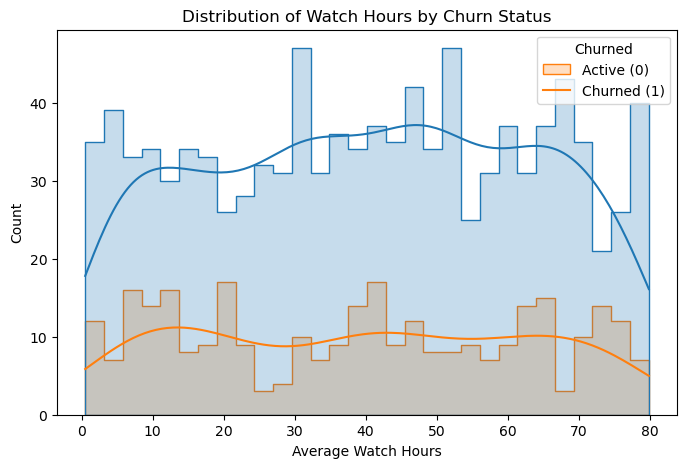

In [31]:
# Histogram - watch hours split by churn
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="average_watch_hours", hue="is_churned", bins=30, kde=True, element="step")
plt.title("Distribution of Watch Hours by Churn Status")
plt.xlabel("Average Watch Hours")
plt.ylabel("Count")
plt.legend(title="Churned", labels=["Active (0)", "Churned (1)"])
plt.show()

# PREDICTIVE MODELLING

# LOGISTIC REGRESSION (Binary Classification)

In [38]:
y = df['is_churned'].astype(int)

# convert tenure_days to days if Timedelta
if np.issubdtype(df['tenure_days'].dtype, np.timedelta64):
    df['tenure_days'] = df['tenure_days'].dt.days

X = df[['age','gender','country','subscription_type',
        'average_watch_hours','mobile_app_usage_pct',
        'complaints_raised','received_promotions',
        'referred_by_friend','monthly_fee','tenure_days']]

# one-hot encode all object/category columns
X_enc = pd.get_dummies(X, drop_first=True)  

# Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000)

# Train the model
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
# Make predictions
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

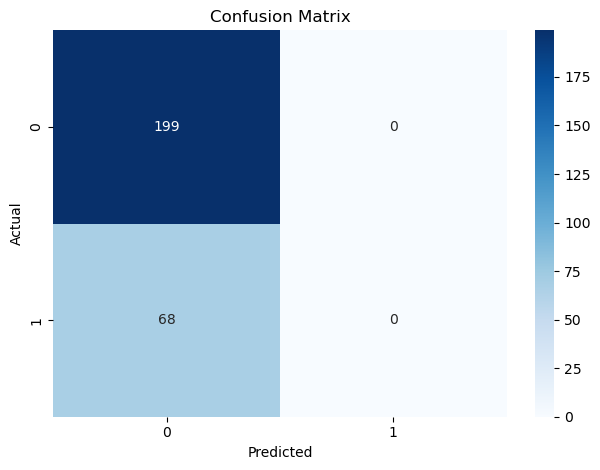

In [40]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [43]:
# precision, recall, f1
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.0
Recall: 0.0
F1 Score: 0.0


ROC AUC: 0.5016257759385161


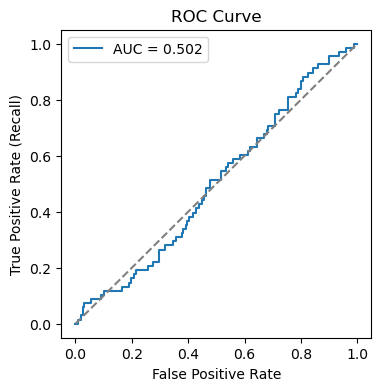

In [46]:
# AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC:", auc)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [48]:
# Interpreting the model coeffecients
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Get coefficients directly
coefs = log_model.coef_.ravel()
feature_names = X_train.columns  
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefs,
    "odds_ratio": np.exp(coefs)
}).sort_values(by="coefficient", key=abs, ascending=False)

print(coef_df.head(15))

                       feature  coefficient  odds_ratio
14  subscription_type_Standard     0.458443    1.581610
13   subscription_type_Premium     0.357112    1.429196
12                 country_USA    -0.303557    0.738188
15     received_promotions_Yes    -0.294805    0.744677
11                  country_UK     0.275801    1.317586
16      referred_by_friend_Yes    -0.191590    0.825645
7                 gender_Other    -0.179620    0.835588
6                  gender_Male    -0.157565    0.854221
8               country_France    -0.090693    0.913298
10               country_India     0.071468    1.074084
4                  monthly_fee    -0.062606    0.939314
9              country_Germany     0.026990    1.027357
0                          age     0.005558    1.005574
3            complaints_raised    -0.002541    0.997462
2         mobile_app_usage_pct     0.002215    1.002217


# LINEAR REGRESSION 

In [ ]:
# Since 'is_churned' is binary, linear regression isn't ideal for prediction. 

In [50]:
# Prepare the data for Linear regression 
X = df[['average_watch_hours']] 
Y = df[['is_churned']]

# Split data into 80% train and 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [53]:
# Create model 
lr_model = LinearRegression()

# Train model 
lr_model.fit(X_train, Y_train)

# Make predictions
Y_pred = lr_model.predict(X_test)

In [54]:
# Metrics
# R²
r2 = r2_score(Y_test, Y_pred)

# RMSE (square root of MSE)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: -0.003831440535903452
RMSE: 0.4365159630461162


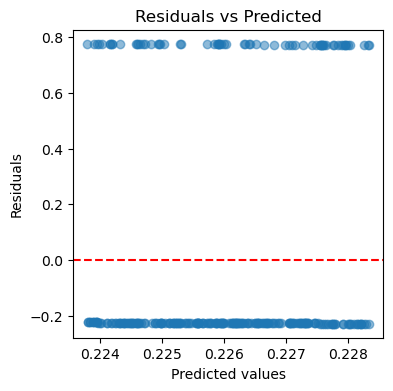

In [56]:
# Residuals
# Residuals = Actual - predicted
residuals = Y_test.values.flatten() - Y_pred.flatten()

# Residuals vs Predicted
plt.figure(figsize=(4,4))
plt.scatter(Y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

In [57]:
# Interpreting coefficients for business insights (eg; impact of subscription type on watch hours)

coef = lr_model.coef_[0][0]
intercept = lr_model.intercept_[0]
print("Intercept:", intercept)
print("Coefficient for average_watch_hours:", coef)

X = pd.get_dummies(
    df[['subscription_type','average_watch_hours']], drop_first=True
)
Y = df[['is_churned']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# Show coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)

Intercept: 0.2283761943787661
Coefficient for average_watch_hours: -5.754486666035424e-05
                      Feature  Coefficient
2  subscription_type_Standard     0.035979
0         average_watch_hours    -0.000072
1   subscription_type_Premium    -0.025460


In [58]:
# From the results, Premium users are predicted to have a 0.025 lower churn score compared to the baseline subscription
# Watch hours is very less, hence it might increase churn likelihood

# BUSINESS QUESTIONS

In [62]:
df.head(10)

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee,tenure_days,is_loyal
0,1001.0,56.0,Other,2025-02-04,2025-07-13,France,Standard,42.6,77.4,1.0,No,No,1,10.99,159,No
1,1002.0,69.0,Male,2023-02-01,2025-07-13,India,Basic,65.3,98.0,4.0,No,Yes,1,5.99,893,Yes
2,1003.0,46.0,Male,2022-08-21,2025-07-13,UK,Premium,40.1,47.8,0.0,No,Yes,1,13.99,1057,Yes
3,1004.0,32.0,Other,2023-09-14,2025-07-13,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1,13.99,668,Yes
4,1005.0,60.0,Female,2023-07-29,2025-07-13,India,Standard,32.7,16.8,5.0,No,Yes,0,9.99,715,Yes
5,1006.0,25.0,Male,2023-06-25,2025-07-13,USA,Premium,40.0,24.7,1.0,No,Yes,0,13.99,749,Yes
6,1007.0,38.0,Male,2023-02-15,2025-07-13,UK,Premium,57.8,83.9,0.0,No,Yes,0,14.99,879,Yes
7,1008.0,56.0,Male,2022-12-20,2025-07-13,Germany,Premium,9.0,35.6,5.0,No,Yes,0,14.99,936,Yes
9,1010.0,40.0,Male,2024-07-11,2025-07-13,France,Basic,21.5,70.9,5.0,Yes,Yes,0,6.99,367,Yes
11,1012.0,28.0,Other,2025-01-16,2025-07-13,France,Basic,58.7,50.7,0.0,Yes,Yes,0,5.99,178,No


In [72]:
# 1. Do users who receive promotions churn less? 
churn_rate = df.groupby('received_promotions')['is_churned'].mean() * 100
print("\n Churn vs Received Promotions")
display(churn_rate)


 Churn vs Received Promotions


received_promotions
No     25.659824
Yes    20.583717
Name: is_churned, dtype: float64

In [ ]:
# This shows that people who have received promotions have churned considerably less than people 
# who have not received promotions

In [68]:
# 2. Does watch time impact churn likelihood?
churn_likelihood = df.groupby('is_churned')['average_watch_hours'].mean()
print("\n Average Watch hours versus Churn likelihood")
display(churn_likelihood)


 Average Watch hours versus Churn likelihood


is_churned
0    40.300586
1    39.255987
Name: average_watch_hours, dtype: float64

In [74]:
# There seems to be not much difference in the average watch hours for churned or not churned customers

In [73]:
# 3. Are mobile dominant users more likely to cancel?
df['mobile_dominant'] = df['mobile_app_usage_pct'] > 70

# Churn rate by mobile dominant status
mobile_churn = df.groupby('mobile_dominant')['is_churned'].mean() * 100

print("\nChurn Rate (%) for Mobile Dominant vs Non-Dominant")
print(mobile_churn)


Churn Rate (%) for Mobile Dominant vs Non-Dominant
mobile_dominant
False    22.777778
True     24.018476
Name: is_churned, dtype: float64


In [75]:
# This indicates that mobile dominant users are more likely to cancel. 

In [76]:
# 4. What are the top 3 features influencing churn based on your model?
# Based on the interpreting model coeffecients, the top three features influencing churn
# subscription type (Standard and Premuim) and country (USA).
# Standard and Premium subscribers churn significantly more than Basic users (58% and 43% higher likelihood, respectively).
# Users from the USA churn less than the baseline country (26% lower odds).

In [77]:
# 5. Which customer segment should the retention team prioritize? 
# Based on the interpretation of model coeffecients, high churn risk segments are the ones where the odds ratio > 1 --> prioritze for retention
# The retention team should prioritize Standard and Premium subscribers as well as customers in the UK market, 
# since these groups have significantly higher churn odds. Meanwhile, users who receive promotions or join via 
# referrals show lower churn and may need less immediate intervention.